So lets do something, we want to esnure quantile quanitle linkage between the historical 1800s to the recent 1900s.

My way of thinking, grab the 30 years beforehand (so 1846 to 1875) and the afterhadn (so 1880 to 1909), these are the represneabltle climatoligcal periods for both the historical and the current temperature.




In [1]:
from bisect import bisect_left
import sys
sys.path.append(r"C:\Users\jarra\Desktop\Masters\Heatwave_Project")
import pandas as pd
import PT13_Functions_For_Masters_New_Test as HW_Func

import Strictly_Functions_Project as SFP
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau


import scipy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings("ignore")
#RMSE 
from sklearn.metrics import mean_squared_error
from math import sqrt
from datetime import datetime
import seaborn as sns
import math

In [2]:
#Now lets load thedatasets in
Hist_Max = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\FOR HOMOGENISATION\Tmax_Est_1830_1875.csv")
Hist_Min = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\FOR HOMOGENISATION\Tmin_Est_1830_1875.csv")
Present = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\FOR HOMOGENISATION\ACORN_SAT_1880_2021.csv")

In [3]:

Hist_Max['date'] = pd.to_datetime(Hist_Max['date'])
Hist_Min['date'] = pd.to_datetime(Hist_Min['date'])
Present['date'] = pd.to_datetime(Present['date'])

#Max_T_Estimation_1830_75= Max_T_Estimation_1830_75.set_index('date')
#Min_T_Estimation_1830_75= Min_T_Estimation_1830_75.set_index('date')


Hist_Max



,date,Max Mean,Max Median,Max Lower CI (60%),Max Upper CI (60%),Max Lower CI (90%),Max Upper CI (90%),Max Full Range,Max_1,Max_2,...,Max_991,Max_992,Max_993,Max_994,Max_995,Max_996,Max_997,Max_998,Max_999,Max_1000
0,1830-04-16,27.00,27.00,26.96,27.05,26.92,27.09,0.30,27.06,26.98,...,27.00,26.99,27.07,26.95,27.07,26.96,27.01,26.97,27.02,27.00
1,1830-04-17,27.58,27.58,27.53,27.63,27.49,27.68,0.34,27.66,27.57,...,27.58,27.58,27.65,27.53,27.65,27.53,27.59,27.54,27.59,27.59
2,1830-04-18,29.63,29.62,29.47,29.79,29.31,29.93,1.15,29.75,29.78,...,29.44,29.57,29.55,29.69,29.91,29.88,29.71,29.49,29.56,29.65
3,1830-04-19,28.34,28.34,28.26,28.42,28.18,28.51,0.66,28.58,28.32,...,28.25,28.52,28.19,28.32,28.25,28.24,28.26,28.41,28.33,28.24
4,1830-04-20,26.18,26.18,26.15,26.22,26.11,26.26,0.26,26.16,26.12,...,26.13,26.21,26.15,26.30,26.12,26.24,26.20,26.17,26.20,26.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16692,1875-12-28,39.08,39.07,38.96,39.21,38.85,39.35,0.97,39.00,39.03,...,39.21,38.75,39.22,38.97,39.19,39.08,39.31,38.90,38.99,39.15
16693,1875-12-29,36.14,36.13,36.04,36.24,35.95,36.35,0.80,36.07,36.09,...,36.24,35.89,36.26,36.06,36.23,36.14,36.32,36.01,36.06,36.20
16694,1875-12-30,33.20,33.20,33.12,33.28,33.05,33.36,0.64,33.15,33.15,...,33.27,33.02,33.30,33.14,33.28,33.20,33.34,33.11,33.13,33.26
16695,1875-12-31,27.43,27.42,27.38,27.47,27.34,27.52,0.39,27.40,27.36,...,27.43,27.40,27.49,27.42,27.47,27.43,27.48,27.43,27.38,27.47


In [4]:
Hist_Min

,date,Min Mean,Min Median,Min Lower CI (60%),Min Upper CI (60%),Min Lower CI (90%),Min Upper CI (90%),Min Full Range,Min_1,Min_2,...,Min_991,Min_992,Min_993,Min_994,Min_995,Min_996,Min_997,Min_998,Min_999,Min_1000
0,1830-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1830-04-17,15.12,15.00,14.93,15.09,14.88,16.11,1.59,15.09,15.07,...,14.88,14.92,14.98,14.91,14.90,15.02,15.01,15.03,15.05,14.95
2,1830-04-18,18.18,18.18,18.10,18.26,18.02,18.34,0.61,18.25,18.22,...,18.06,18.21,18.19,18.21,18.19,18.21,18.22,17.98,18.32,18.15
3,1830-04-19,19.16,19.16,19.06,19.25,18.96,19.35,0.71,19.24,19.20,...,18.99,19.21,19.18,19.19,19.19,19.21,19.22,18.93,19.33,19.13
4,1830-04-20,12.51,12.51,12.45,12.57,12.39,12.63,0.46,12.47,12.54,...,12.68,12.41,12.41,12.52,12.39,12.42,12.43,12.47,12.46,12.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16692,1875-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16693,1875-12-29,22.61,22.61,22.41,22.80,22.27,22.97,1.47,22.95,22.22,...,22.85,22.25,22.58,22.72,22.63,22.52,22.36,22.90,22.58,23.00
16694,1875-12-30,19.72,18.55,18.42,21.29,18.35,21.46,3.51,21.45,18.38,...,21.42,18.37,21.18,21.32,21.23,18.43,18.54,21.46,18.48,21.52
16695,1875-12-31,19.54,19.40,19.26,19.87,19.17,20.00,1.21,19.95,19.22,...,20.00,19.21,19.79,19.91,19.84,19.29,19.37,20.02,19.32,20.04


In [5]:
Present

,date,tmax,tmin
0,1880-01-01,39.3,24.5
1,1880-01-02,41.2,22.2
2,1880-01-03,41.2,19.8
3,1880-01-04,41.5,20.4
4,1880-01-05,39.8,17.4
...,...,...,...
51676,2021-06-26,20.3,5.8
51677,2021-06-27,15.6,8.7
51678,2021-06-28,19.7,10.5
51679,2021-06-29,18.0,12.5


For a reference case lets just use the mean, then we can build it up into a for loop function that does it on all the other periods and trials.

In [6]:
Hist_Max_Mean = Hist_Max[['date','Max Mean']]
Hist_Min_Mean = Hist_Min[['date','Min Mean']]

In [7]:
Hist_Max_Mean = Hist_Max_Mean.rename(columns={'Max Mean':'tmax'})
Hist_Min_Mean = Hist_Min_Mean.rename(columns={'Min Mean':'tmin'})

Hist_Mean = pd.concat([Hist_Max_Mean['date'], Hist_Max_Mean['tmax'],Hist_Min_Mean['tmin']],axis = 1)

In [8]:
Hist_Mean =Hist_Mean.round(1).set_index('date')
Hist_Mean

,tmax,tmin
date,,
1830-04-16,27.0,NaN
1830-04-17,27.6,15.1
1830-04-18,29.6,18.2
1830-04-19,28.3,19.2
1830-04-20,26.2,12.5
...,...,...
1875-12-28,39.1,NaN
1875-12-29,36.1,22.6
1875-12-30,33.2,19.7


In [9]:
Present = Present.set_index('date')
Present

,tmax,tmin
date,,
1880-01-01,39.3,24.5
1880-01-02,41.2,22.2
1880-01-03,41.2,19.8
1880-01-04,41.5,20.4
1880-01-05,39.8,17.4
...,...,...
2021-06-26,20.3,5.8
2021-06-27,15.6,8.7
2021-06-28,19.7,10.5


Now lets extract the 30 year climatolgoical periods

In [10]:
Hist_30 = Hist_Mean.loc['1846-01-01':'1875-12-31']
Pres_30 = Present.loc['1880-01-01':'1909-12-31']
Hist_30

,tmax,tmin
date,,
1846-01-01,19.6,16.1
1846-01-02,25.8,13.5
1846-01-03,30.9,14.6
1846-01-04,17.5,19.3
1846-01-05,26.3,12.2
...,...,...
1875-12-27,NaN,NaN
1875-12-28,39.1,NaN
1875-12-29,36.1,22.6


In [11]:
len(Hist_30)

10957

In [12]:
len(Pres_30)

10957

So they are the same length and they had 30 years worth of data now, I think the first thing to look at are:
    
    The histograms of the overall climates
    The histograms of each month

In [ ]:
#Histogram of the overall climate
plt.figure()
sns.histplot(data=Hist_30, x="tmax", kde=True, label = 'Historical',cumulative=True,stat='density')
sns.histplot(data=Pres_30, x="tmax", kde=True,color = 'r',label = 'Present',cumulative=True,stat='density')

#Histogram of the overall climate
plt.figure()
sns.histplot(data=Hist_30, x="tmax", kde=True, label = 'Historical',cumulative=False,stat='density')
sns.histplot(data=Pres_30, x="tmax", kde=True,color = 'r',label = 'Present',cumulative=False,stat='density')

In [ ]:
#Histogram of the overall climate
plt.figure()
sns.histplot(data=Hist_30, x="tmin", kde=True, label = 'Historical',cumulative=True,stat='density')
sns.histplot(data=Pres_30, x="tmin", kde=True,color = 'r',label = 'Present',cumulative=True,stat='density')
plt.figure()
sns.histplot(data=Hist_30, x="tmin", kde=True, label = 'Historical',cumulative=False,stat='density')
sns.histplot(data=Pres_30, x="tmin", kde=True,color = 'r',label = 'Present',cumulative=False,stat='density')

From the annual plots, it seems to be that theres about 2000 less datapoints in a 30 year period for the historical context, however month to month may show a different story. Despite this we see that the the cumulative distrbution a much clearer shift to the more warmer tmeperatures in both max and min with the minimum temperature being more extreme is terms of the differences. Thereofre there is room for adjustment here.

One of the major issues is that we are missing 4 years worth of data, therefore if there is any variability signal within this 5 year gap, we wont know about it.

But we can plot the two periods together in terms of resmapling by month to see if there was any signifnacatn changeed

In [ ]:
plt.plot(Hist_30['tmax'].loc["1870-01-01":"1875-12-31"].resample('m').mean())
plt.plot(Pres_30['tmax'].loc["1880-01-01":"1885-12-31"].resample('m').mean())

In [ ]:
Hist_30

In [ ]:
HQ_99 = Hist_30.quantile(0.99)
HQ_95 = Hist_30.quantile(0.95)
HQ_90 = Hist_30.quantile(0.90)
HQ_80 = Hist_30.quantile(0.80)
HQ_70 = Hist_30.quantile(0.70)
HQ_60 = Hist_30.quantile(0.60)
HQ_50 = Hist_30.quantile(0.50)
HQ_40 = Hist_30.quantile(0.40)
HQ_30 = Hist_30.quantile(0.30)
HQ_20 = Hist_30.quantile(0.20)
HQ_10 = Hist_30.quantile(0.10)
HQ_05 = Hist_30.quantile(0.05)
HQ_01 = Hist_30.quantile(0.01)

In [ ]:
PQ_99 = Pres_30.quantile(0.99)
PQ_95 = Pres_30.quantile(0.95)
PQ_90 = Pres_30.quantile(0.90)
PQ_80 = Pres_30.quantile(0.80)
PQ_70 = Pres_30.quantile(0.70)
PQ_60 = Pres_30.quantile(0.60)
PQ_50 = Pres_30.quantile(0.50)
PQ_40 = Pres_30.quantile(0.40)
PQ_30 = Pres_30.quantile(0.30)
PQ_20 = Pres_30.quantile(0.20)
PQ_10 = Pres_30.quantile(0.10)
PQ_05 = Pres_30.quantile(0.05)
PQ_01 = Pres_30.quantile(0.01)

In [ ]:
plt.figure(1)
X = 1
for i in [HQ_99,HQ_95,HQ_90,HQ_80,HQ_70,HQ_60,HQ_50,HQ_40,HQ_30,HQ_20,HQ_10,HQ_05,HQ_01]:
    plt.figure(1)
    plt.plot(X,i['tmax'],'.',color = 'orange')
    plt.figure(2)
    plt.plot(X,i['tmin'],'.',color = 'cyan')
X = 2
for i in [PQ_99,PQ_95,PQ_90,PQ_80,PQ_70,PQ_60,PQ_50,PQ_40,PQ_30,PQ_20,PQ_10,PQ_05,PQ_01]:
    plt.figure(1)
    plt.plot(X,i['tmax'],'.',color = 'red')
    plt.figure(2)
    plt.plot(X,i['tmin'],'.',color = 'blue')


plt.figure(1)
plt.plot(1,HQ_99['tmax'],'.',color = 'orange',markersize = '10',label = "Q=0.99")
plt.figure(2)
plt.plot(1,HQ_99['tmin'],'.',color = 'cyan',markersize = '10',label = "Q=0.99")

plt.figure(1)
plt.plot(1,HQ_50['tmax'],'.',color = 'orange',markersize = '20',label = "Q=0.50")
plt.figure(2)
plt.plot(1,HQ_50['tmin'],'.',color = 'cyan',markersize = '20',label = "Q=0.50")

plt.figure(1)
plt.plot(1,HQ_01['tmax'],'.',color = 'orange',markersize = '10',label = "Q=0.01")
plt.figure(2)
plt.plot(1,HQ_01['tmin'],'.',color = 'cyan',markersize = '10',label = "Q=0.01")

plt.figure(1)
plt.plot(2,PQ_99['tmax'],'.',color = 'red',markersize = '10',label = "Q=0.99")
plt.figure(2)
plt.plot(2,PQ_99['tmin'],'.',color = 'blue',markersize = '10',label = "Q=0.99")

plt.figure(1)
plt.plot(2,PQ_50['tmax'],'.',color = 'red',markersize = '20',label = "Q=0.50")
plt.figure(2)
plt.plot(2,PQ_50['tmin'],'.',color = 'blue',markersize = '20',label = "Q=0.50")

plt.figure(1)
plt.plot(2,PQ_01['tmax'],'.',color = 'red',markersize = '10',label = "Q=0.01")
plt.legend(loc = 'upper center')
plt.figure(2)
plt.plot(2,PQ_01['tmin'],'.',color = 'blue',markersize = '10',label = "Q=0.01")
plt.legend(loc = 'upper center')


In [ ]:
#Now lets pick a random day in the historical context
Hist_30['tmax'].loc["1870-01-01"]



In [ ]:
#So this temp is 25.9 in the historical context
#This is between: HQ_60 and HQ_70
HQ_60
HQ_70

In [ ]:
#Now we calculate the percentage distance ebtween the quantiles and the value

Percent_Dist = (25.9 - HQ_60['tmax'])/(HQ_70['tmax'] - HQ_60['tmax'])*100
Percent_Dist

In [ ]:
#Now we go to the newer temperatures and find the temperature that gets that percentage
Temp_New = ((Percent_Dist/100)*(PQ_70['tmax'] - PQ_60['tmax'])) + PQ_60['tmax']
Temp_New.round(1)

In [ ]:
#So the quantile adjustment is 25.9 to 24.1 so an adjustment of 1.8C to the new temperatures

#So what do we do with the top and bottom 1%?

In [ ]:
import numpy as np
import statsmodels.api as sm
import pylab

test = np.random.normal(0,1, 1000)

sm.qqplot(Hist_30['tmax'],line='45')
sm.qqplot(Pres_30['tmax'],line='45')

pylab.show()

In [ ]:
sm.qqplot(Hist_30['tmin'],line='45')
sm.qqplot(Pres_30['tmin'],line='45')
pylab.show()

In [ ]:
#So let me guess i have to normally distributw them
ND_H = (Hist_30 -Hist_30.mean())/np.std(Hist_30)
ND_P = (Pres_30 -Pres_30.mean())/np.std(Pres_30)

sm.qqplot(ND_H['tmax'],line='45')
sm.qqplot(ND_P['tmax'],line='45')

In [ ]:
sm.qqplot(ND_H['tmin'],line='45')
sm.qqplot(ND_P['tmin'],line='45')

older data

newer data
so with the newer data, rank the value to find the percentiles

allowing to see correction needs to be done in the extremes 

Q-Q talk to alex obs and model data

Sort data pick out percentile dont want to assume normal distribution 

## LETS RESTART
So now I have a draft and seen what alex has done, now I can do this, we expect that HIST:PRES == 1:1 so that is the first plot we must do, this IS IN TERMS OF QUANTILES, and we will refwerence the PRES as the 1:1

In [ ]:
Pres_30
Hist_30


In [ ]:
Q_Pres_mx = Pres_30['tmax'].quantile(np.arange(0,1.0001,0.0001))

Q_Hist_mx = Hist_30['tmax'].quantile(np.arange(0,1.0001,0.0001))

#Now we can calcualte the graph of the 1 to 1 based on the quantiles and then use the tmeperature to be aorund them

In [ ]:
plt.plot(Q_Pres_mx,Q_Pres_mx)
#plt.xlim([0,1])
#plt.ylim([0,1])
plt.xlabel('PRESENT (1880-1909)')
plt.ylabel('PRESENT (1946-1975)')

plt.plot(Q_Pres_mx,Q_Hist_mx)

plt.plot(Q_Pres_mx[0.999],Q_Hist_mx[0.999],'.',color = 'red', markersize = '10',label = 'Q = 99.9%')

plt.plot(Q_Pres_mx[0.9],Q_Hist_mx[0.9],'.',color = 'orange', markersize = '10',label = 'Q = 90%')

plt.plot(Q_Pres_mx[0.75],Q_Hist_mx[0.75],'.',color = 'yellow', markersize = '10',label = 'Q = 75%')

plt.plot(Q_Pres_mx[0.5],Q_Hist_mx[0.5],'.',color = 'green', markersize = '10',label = 'Q = 50%')

plt.plot(Q_Pres_mx[0.25],Q_Hist_mx[0.25],'.',color = 'blue', markersize = '10',label = 'Q = 25%')

plt.plot(Q_Pres_mx[0.1],Q_Hist_mx[0.1],'.',color = 'indigo', markersize = '10',label = 'Q = 10%')

plt.plot(Q_Pres_mx[0.001],Q_Hist_mx[0.001],'.',color = 'violet', markersize = '10',label = 'Q = 0.1%')

plt.legend(loc = 'upper center')
plt.grid()

Now we cna mathc this 1:1 and sort this shit out really, go month by month and once this is complete then I can use it over the trials and this seciton can be completed which will ultimately have a full temperautee record.

In [ ]:
Q_Pres_mx = Pres_30['tmin'].quantile(np.arange(0,1.0001,0.0001))

Q_Hist_mx = Hist_30['tmin'].quantile(np.arange(0,1.0001,0.0001))

plt.plot(Q_Pres_mx,Q_Pres_mx)
#plt.xlim([0,1])
#plt.ylim([0,1])
plt.xlabel('PRESENT (1880-1909)')
plt.ylabel('PRESENT (1946-1975)')

plt.plot(Q_Pres_mx,Q_Hist_mx)

plt.plot(Q_Pres_mx[0.999],Q_Hist_mx[0.999],'.',color = 'red', markersize = '10',label = 'Q = 99.9%')

plt.plot(Q_Pres_mx[0.9],Q_Hist_mx[0.9],'.',color = 'orange', markersize = '10',label = 'Q = 90%')

plt.plot(Q_Pres_mx[0.75],Q_Hist_mx[0.75],'.',color = 'yellow', markersize = '10',label = 'Q = 75%')

plt.plot(Q_Pres_mx[0.5],Q_Hist_mx[0.5],'.',color = 'green', markersize = '10',label = 'Q = 50%')

plt.plot(Q_Pres_mx[0.25],Q_Hist_mx[0.25],'.',color = 'blue', markersize = '10',label = 'Q = 25%')

plt.plot(Q_Pres_mx[0.1],Q_Hist_mx[0.1],'.',color = 'indigo', markersize = '10',label = 'Q = 10%')

plt.plot(Q_Pres_mx[0.001],Q_Hist_mx[0.001],'.',color = 'violet', markersize = '10',label = 'Q = 0.1%')

plt.legend(loc = 'upper center')

Now lets apply a function that uses this information and adjusted the data to the 1:1 relationship appropiately

In [ ]:
Hist_Test = 27.1

#array = np.arange(0, 40.001, 0.001)  # Generate the array with values from 0 to 40

closest_index = np.abs(Q_Hist_mx - Hist_Test).argmin()
index_value = closest_index/10000
Temp_Updated = Q_Pres_mx[index_value:index_value+0.0001]
Temp_Updated[1:,]

In [ ]:
np.abs(Q_Hist_mx - Hist_Test).argmin().round(0)


Q_Pres_mx[0.9960:0.9962]

In [ ]:
Hist_30_T = Hist_30.reset_index()
Hist_30_T['date'] = pd.to_datetime(Hist_30_T['date'])
Hist_Month = Hist_30_T.loc[Hist_30_T['date'].dt.month == 8]

Pres_30_T = Pres_30.reset_index()
Pres_30_T['date'] = pd.to_datetime(Pres_30_T['date'])
Pres_Month = Pres_30_T.loc[Pres_30_T['date'].dt.month == 8]


In [ ]:
Q_Pres_mx = Pres_Month['tmax'].quantile(np.arange(0,1.0001,0.0001))

Q_Hist_mx = Hist_Month['tmax'].quantile(np.arange(0,1.0001,0.0001))

In [ ]:
plt.plot(Q_Pres_mx,Q_Pres_mx)
#plt.xlim([0,1])
#plt.ylim([0,1])
plt.xlabel('PRESENT (1880-1909)')
plt.ylabel('PRESENT (1946-1975)')

plt.plot(Q_Pres_mx,Q_Hist_mx)

plt.plot(Q_Pres_mx[0.999],Q_Hist_mx[0.999],'.',color = 'red', markersize = '10',label = 'Q = 99.9%')

plt.plot(Q_Pres_mx[0.9],Q_Hist_mx[0.9],'.',color = 'orange', markersize = '10',label = 'Q = 90%')

plt.plot(Q_Pres_mx[0.75],Q_Hist_mx[0.75],'.',color = 'yellow', markersize = '10',label = 'Q = 75%')

plt.plot(Q_Pres_mx[0.5],Q_Hist_mx[0.5],'.',color = 'green', markersize = '10',label = 'Q = 50%')

plt.plot(Q_Pres_mx[0.25],Q_Hist_mx[0.25],'.',color = 'blue', markersize = '10',label = 'Q = 25%')

plt.plot(Q_Pres_mx[0.1],Q_Hist_mx[0.1],'.',color = 'indigo', markersize = '10',label = 'Q = 10%')

plt.plot(Q_Pres_mx[0.001],Q_Hist_mx[0.001],'.',color = 'violet', markersize = '10',label = 'Q = 0.1%')

plt.legend(loc = 'upper center')
plt.grid()

## Now combining this altogether to make a for loop

Lets begin by starting with finding the 30 year periods we aim to match with

In [ ]:
Hist_30 = Hist_Mean.loc['1846-01-01':'1875-12-31']
Pres_30 = Present.loc['1880-01-01':'1909-12-31']
Pres_30

Now we want to use these values and reset there index

In [ ]:
Hist_30_RI = Hist_30.reset_index()
Pres_30_RI = Pres_30.reset_index()

Now we want to go through a for loop take the Q-Q for each month and save it, we want to go until we reach a value of more then 99.9%

In [ ]:
Month_Number = [1,2,3,4,5,6,7,8,9,10,11,12]
Q_Q_Mx_His = {}
Q_Q_Mn_His = {}

Q_Q_Mx_Pre = {}
Q_Q_Mn_Pre = {}


#Apply for loop
for MN in Month_Number:
    Hist_Month = Hist_30_T.loc[Hist_30_T['date'].dt.month == MN]
    Pres_Month = Pres_30_T.loc[Pres_30_T['date'].dt.month == MN]
    
    #develop the index and values for the Q-Q Max
    Q_Pres_mx = Pres_Month['tmax'].quantile(np.arange(0,1.001,0.001))
    Q_Hist_mx = Hist_Month['tmax'].quantile(np.arange(0,1.001,0.001))
    #develop the index and values for the Q-Q Min
    Q_Pres_mn = Pres_Month['tmin'].quantile(np.arange(0,1.001,0.001))
    Q_Hist_mn = Hist_Month['tmin'].quantile(np.arange(0,1.001,0.001))
    
    
    #Now save these as a dictionary so they can be recalled again
    Q_Q_Mx_His["Month" +"_"+ str(MN)] =Q_Hist_mx
    Q_Q_Mx_Pre["Month" +"_"+ str(MN)] =Q_Pres_mx
    Q_Q_Mn_His["Month" +"_"+ str(MN)] =Q_Hist_mn
    Q_Q_Mn_Pre["Month" +"_"+ str(MN)] =Q_Pres_mn
    
    
    
#Now Done that, we can then move onto matching the data to the Q-Q
Hist_Test = Hist_Mean.reset_index()
#This above is the full range of historical data

Hist_Updated_Max = []



for i in range(0,len(Hist_Test)):
    Month_Value = Hist_Test['date'].loc[i].month
    
    #Now get all the information from the Q-Q data
    #MAX
    if (math.isnan(Hist_Test['tmax'].loc[i])== True):
        Temp_Mx = np.NaN
    else:
        QMXHIS = Q_Q_Mx_His.get('Month_{}'.format(Month_Value))
        QMXPRE = Q_Q_Mx_Pre.get('Month_{}'.format(Month_Value))
        Hist_Temp_Mx = Hist_Test['tmax'].loc[i]
        
        closest_index = np.abs(QMXHIS - Hist_Temp_Mx).argmin()
        index_value = closest_index/1000
        print(index_value)
        Temp_Mx = QMXPRE[index_value]
        
    #Hist_Updated_Max.append(Temp_Mx)
        

In [ ]:
QMXPRE[0.68:0.72]

In [ ]:
Q_Q_Mx_Pre

In [ ]:
import math
math.isnan(Hist_Test['tmax'].loc[16693])== True


In [ ]:
np.arange(0,1.0001,0.0001)

In [ ]:
len(np.arange(0,1.0001,0.0001))

In [ ]:
Q_Tester = Q_Q_Mx_His.get('Month_1')
Q_Tester[0.7]

In [ ]:
Pres_30 = Pres_30['tmax'].quantile(np.arange(0,1.001,0.001))

In [ ]:
Pres_30

## LETS RESTART PART 2, SOMEHOW THE CODE DID NOT WORK

In [ ]:
#DATA WE DO HAVE
Pres_30
Hist_30
Hist_Mean

#So since we have the data we are using for the Q-Q which is Hist_30, and Pres_30 we want to try and do this on an annual version then a monthly version then we can finalise it with the for loop for the monthly values

In [ ]:
#Annual
Q_Pres = Pres_30.quantile(np.arange(0,1.0001,0.0001)).round(4)
Q_Pres = Q_Pres.rename_axis('Quantile').reset_index()

Q_Hist = Hist_30.quantile(np.arange(0,1.0001,0.0001)).round(4)
Q_Hist = Q_Hist.rename_axis('Quantile').reset_index()
Q_Hist

The original way in restart 1, I used the tmax and tmin separately, this time though I wont be doing that and using them togethher


#Now we can calcualte the graph of the 1 to 1 based on the quantiles and then use the tmeperature to be aorund them

In [ ]:
plt.plot(Q_Pres['tmax'],Q_Pres['tmax'])
#plt.xlim([0,1])
#plt.ylim([0,1])
plt.xlabel('PRESENT (1880-1909)')
plt.ylabel('PRESENT (1946-1975)')

plt.plot(Q_Pres['tmax'],Q_Hist['tmax'])

plt.plot(Q_Pres['tmax'].loc[9990],Q_Hist['tmax'].loc[9990],'.',color = 'red', markersize = '10',label = 'Q = 99.9%')

plt.plot(Q_Pres['tmax'].loc[9000],Q_Hist['tmax'].loc[9000],'.',color = 'orange', markersize = '10',label = 'Q = 90%')

plt.plot(Q_Pres['tmax'].loc[7500],Q_Hist['tmax'].loc[7500],'.',color = 'yellow', markersize = '10',label = 'Q = 75%')

plt.plot(Q_Pres['tmax'].loc[5000],Q_Hist['tmax'].loc[5000],'.',color = 'green', markersize = '10',label = 'Q = 50%')

plt.plot(Q_Pres['tmax'].loc[2500],Q_Hist['tmax'].loc[2500],'.',color = 'blue', markersize = '10',label = 'Q = 25%')

plt.plot(Q_Pres['tmax'].loc[1000],Q_Hist['tmax'].loc[1000],'.',color = 'indigo', markersize = '10',label = 'Q = 10%')

plt.plot(Q_Pres['tmax'].loc[10],Q_Hist['tmax'].loc[10],'.',color = 'violet', markersize = '10',label = 'Q = 0.1%')

plt.legend(loc = 'upper left')
plt.grid()

In [ ]:
plt.plot(Q_Pres['tmin'],Q_Pres['tmin'])
#plt.xlim([0,1])
#plt.ylim([0,1])
plt.xlabel('PRESENT (1880-1909)')
plt.ylabel('PRESENT (1946-1975)')

plt.plot(Q_Pres['tmin'],Q_Hist['tmin'])

plt.plot(Q_Pres['tmin'].loc[9990],Q_Hist['tmin'].loc[9990],'.',color = 'red', markersize = '10',label = 'Q = 99.9%')

plt.plot(Q_Pres['tmin'].loc[9000],Q_Hist['tmin'].loc[9000],'.',color = 'orange', markersize = '10',label = 'Q = 90%')

plt.plot(Q_Pres['tmin'].loc[7500],Q_Hist['tmin'].loc[7500],'.',color = 'yellow', markersize = '10',label = 'Q = 75%')

plt.plot(Q_Pres['tmin'].loc[5000],Q_Hist['tmin'].loc[5000],'.',color = 'green', markersize = '10',label = 'Q = 50%')

plt.plot(Q_Pres['tmin'].loc[2500],Q_Hist['tmin'].loc[2500],'.',color = 'blue', markersize = '10',label = 'Q = 25%')

plt.plot(Q_Pres['tmin'].loc[1000],Q_Hist['tmin'].loc[1000],'.',color = 'indigo', markersize = '10',label = 'Q = 10%')

plt.plot(Q_Pres['tmin'].loc[10],Q_Hist['tmin'].loc[10],'.',color = 'violet', markersize = '10',label = 'Q = 0.1%')

plt.legend(loc = 'upper left')
plt.grid()

Now that I have the values sorted and the dataframe in a good position, I can go ahead and work out the closest to value from the temperature plot

In [ ]:
#Letting a value be a temperature in the maximum Q-Q
Hist_Test = 27.1

#So now we get the closest value for the max:
Column = ['tmax']

#This finds the value where the Q-Hist of the tmax is the minimum it can be for the tmax value presented
Min_val = np.abs(Q_Hist[Column] - Hist_Test).min()

#This finds the quantile*10^5 or by the decimla place you use to find the tmax
closest_index =  Q_Hist[np.abs(Q_Hist[Column]- Hist_Test) == Min_val].stack().idxmin()

#Now this will use the index to find the Present Vlaue to updayte the historical value to using the index/quantile*10^%
Temp_U = Q_Pres[Column].loc[closest_index[0]]
Temp_U

#And from there we can append it.

In [ ]:
Hist_30_RI = Hist_30.reset_index()
Pres_30_RI = Pres_30.reset_index()

In [ ]:
#Now lets apply this to a monthly version\
#Month = 11

Hist_Month = Hist_30_RI.loc[Hist_30_T['date'].dt.month == 11]
Pres_Month = Pres_30_RI.loc[Pres_30_T['date'].dt.month == 11]


Q_Pres = Pres_Month.quantile(np.arange(0,1.0001,0.0001)).round(4)
Q_Pres = Q_Pres.rename_axis('Quantile').reset_index()

Q_Hist = Hist_Month.quantile(np.arange(0,1.0001,0.0001)).round(4)
Q_Hist = Q_Hist.rename_axis('Quantile').reset_index()
Q_Hist

In [ ]:
#Letting a value be a temperature in the maximum Q-Q
Hist_Test = 27.1

#So now we get the closest value for the max:
Column = ['tmax']

#This finds the value where the Q-Hist of the tmax is the minimum it can be for the tmax value presented
Min_val = np.abs(Q_Hist[Column] - Hist_Test).min().round(3)
Min_val
#This finds the quantile*10^5 or by the decimla place you use to find the tmax
closest_index =  Q_Hist[np.abs(Q_Hist[Column]- Hist_Test).round(3) == Min_val].stack().idxmin()

#Now this will use the index to find the Present Vlaue to updayte the historical value to using the index/quantile*10^%
Temp_U = Q_Pres[Column].loc[closest_index[0]]
Temp_U

#And from there we can append it.

In [ ]:
plt.plot(Q_Pres['tmax'],Q_Pres['tmax'])
#plt.xlim([0,1])
#plt.ylim([0,1])
plt.xlabel('PRESENT (1880-1909)')
plt.ylabel('PRESENT (1946-1975)')

plt.plot(Q_Pres['tmax'],Q_Hist['tmax'])

plt.plot(Q_Pres['tmax'].loc[9990],Q_Hist['tmax'].loc[9990],'.',color = 'red', markersize = '10',label = 'Q = 99.9%')

plt.plot(Q_Pres['tmax'].loc[9000],Q_Hist['tmax'].loc[9000],'.',color = 'orange', markersize = '10',label = 'Q = 90%')

plt.plot(Q_Pres['tmax'].loc[7500],Q_Hist['tmax'].loc[7500],'.',color = 'yellow', markersize = '10',label = 'Q = 75%')

plt.plot(Q_Pres['tmax'].loc[5000],Q_Hist['tmax'].loc[5000],'.',color = 'green', markersize = '10',label = 'Q = 50%')

plt.plot(Q_Pres['tmax'].loc[2500],Q_Hist['tmax'].loc[2500],'.',color = 'blue', markersize = '10',label = 'Q = 25%')

plt.plot(Q_Pres['tmax'].loc[1000],Q_Hist['tmax'].loc[1000],'.',color = 'indigo', markersize = '10',label = 'Q = 10%')

plt.plot(Q_Pres['tmax'].loc[10],Q_Hist['tmax'].loc[10],'.',color = 'violet', markersize = '10',label = 'Q = 0.1%')

plt.legend(loc = 'upper left')
plt.grid()

Now we have the issues sorted, we can go ahead and compute the for loop that goes through each day and pciks the best value

In [ ]:
Hist_30_RI = Hist_30.reset_index()
Pres_30_RI = Pres_30.reset_index()

In [ ]:
number = 0.0001
Historical_All = Hist_Mean
Present = Present
Hist_QQ_Dates_St = '1846-01-01'
Hist_QQ_Dates_En = '1875-12-31'

Pres_QQ_Date_St = "1880-01-01"
Pres_QQ_Date_En = "1909-12-31"
#^ call in using function


    
    

Historical_30 = Historical_All.loc[Hist_QQ_Dates_St:Hist_QQ_Dates_En].reset_index()
Present_30 = Present.loc[Pres_QQ_Date_St:Pres_QQ_Date_En].reset_index()


Month_Number = [1,2,3,4,5,6,7,8,9,10,11,12]
Q_Q_His = {}
Q_Q_Pre = {}


#Apply for loop
for MN in Month_Number:
    Present_M = Present_30.loc[Present_30['date'].dt.month == MN]
    Historical_M = Historical_30.loc[Historical_30['date'].dt.month == MN]
    
    #Select a nparange value lemgth that goes from Q0 to Q1, and produce the quantiles
    Q_Pres_M = Present_M.quantile(np.arange(0,1+number,number)).round(4)
    Q_Pres_M = Q_Pres_M.rename_axis('Quantile').reset_index()

    Q_Hist_M = Historical_M.quantile(np.arange(0,1.0001,0.0001)).round(4)
    Q_Hist_M = Q_Hist_M.rename_axis('Quantile').reset_index()
    
    
    
    #
    #Now save these as a dictionary so they can be recalled again
    Q_Q_His["Month" +"_"+ str(MN)] =Q_Hist_M
    Q_Q_Pre["Month" +"_"+ str(MN)] =Q_Pres_M

    
#Now we have the dictionaries set, we move onto usign it with the entire dataset and estimate the Q-Q

    
Hist_All = Historical_All.reset_index()
#This above is the full range of historical data

#What we will do is append it to max and min values before combiniing with dat
Hist_Updated_Max = []
Hist_Updated_Min = []
Hist_Updated_Date = []



#For loop for all dates 
for i in range(0,len(Hist_All)):
    Hist_Updated_Date.append(Hist_All['date'].loc[i])
    #Month value to extract Q-Q from dictionary
    Month_Value = Hist_All['date'].loc[i].month
    
    #Now get all the information from the Q-Q data for max and min for each date
    #MAX
    
    #If data shows a nan value set the updated value to nan
    if (math.isnan(Hist_All['tmax'].loc[i])== True):
        Hist_Updated_Max.append(np.NaN)
    else:
        #Set Temp old 
        Temp_Old = Hist_All['tmax'].loc[i]
        
        #Extract the monthly data for that date
        QHIS = Q_Q_His.get('Month_{}'.format(Month_Value))
        QPRE = Q_Q_Pre.get('Month_{}'.format(Month_Value))
        
        #So now we get the closest value for the max:
        Column = ['tmax']

        #This finds the value where the Q-Hist of the tmax is the minimum it can be for the tmax value presented
        Min_val = np.abs(QHIS[Column] - Temp_Old).min()

        #This finds the quantile*10^5 or by the decimla place you use to find the tmax
        closest_index =  QHIS[np.abs(QHIS[Column]- Temp_Old) == Min_val].stack().idxmin()

        #Now this will use the index to find the Present Vlaue to updayte the historical value to using the index/quantile*10^%
        Hist_Updated_Max.append(QPRE[Column].loc[closest_index[0]].values[0])
    
    #Now get all the information from the Q-Q data for max and min for each date
    #MIN
    
    #If data shows a nan value set the updated value to nan
    if (math.isnan(Hist_All['tmin'].loc[i])== True):
        Hist_Updated_Min.append(np.NaN)
    else:
        #Set Temp old 
        Temp_Old = Hist_All['tmin'].loc[i]
        
        #Extract the monthly data for that date
        QHIS = Q_Q_His.get('Month_{}'.format(Month_Value))
        QPRE = Q_Q_Pre.get('Month_{}'.format(Month_Value))
        
        #So now we get the closest value for the max:
        Column = ['tmin']

        #This finds the value where the Q-Hist of the tmax is the minimum it can be for the tmax value presented
        Min_val = np.abs(QHIS[Column] - Temp_Old).min()

        #This finds the quantile*10^5 or by the decimla place you use to find the tmax
        closest_index =  QHIS[np.abs(QHIS[Column]- Temp_Old) == Min_val].stack().idxmin()

        #Now this will use the index to find the Present Vlaue to updayte the historical value to using the index/quantile*10^%
        Hist_Updated_Min.append(QPRE[Column].loc[closest_index[0]].values[0])
Hist_Updated_Date = pd.DataFrame(Hist_Updated_Date, columns=['date'])
Hist_Updated_Max = pd.DataFrame(Hist_Updated_Max, columns=['tmax'])
Hist_Updated_Min = pd.DataFrame(Hist_Updated_Min, columns=['tmin'])

        
#Now combine altogether
Hist_Updated = pd.concat([Hist_Updated_Date, Hist_Updated_Max, Hist_Updated_Min], axis = 1)
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
#        Hist_Temp_Mx = Hist_Test['tmax'].loc[i]
#        
##        closest_index = np.abs(QMXHIS - Hist_Temp_Mx).argmin()
#        index_value = closest_index/1000
#        print(index_value)
#        Temp_Mx = QMXPRE[index_value]
        
 #   #Hist_Updated_Max.append(Temp_Mx)
#DONT NEED TO DIVIDE BY MONTHS BUT NOT FOR DIFFERENT TIMES OF THE YEAR, DONT EXPECT THE BIAS TO DIFFER BY THE DATA,
#I THINK THE DISTIBUTION SHOULD BE SMOOTHER, AND LOOK LIKE THE OLD DATA BUT WITH THE NEW DATA

In [ ]:
Hist_Updated = Hist_Updated.round(1).set_index('date')

In [ ]:
Hist_Updated
Hist_Mean
Present

In [ ]:
plt.figure(1)
Hist_Updated.resample('Y').mean().plot()
plt.figure(1)

Hist_Mean.resample('Y').mean().plot()
plt.figure(1)

Present.resample('Y').mean().plot()

In [ ]:
#Plot all together
plt.plot(Hist_Updated.resample('Y').mean(),label = 'Corrected')
plt.plot(Hist_Mean.resample('Y').mean(),label = 'Uncorrected')
plt.plot(Present.resample('Y').mean(),label = 'Present')
plt.legend()

In [ ]:
#Histogram of the overall climate
plt.figure()
sns.histplot(data=Hist_30.loc['1846-01-01':'1875-12-31'], x="tmin", kde=True, label = 'Historical Uncorrected',cumulative=True,stat='density',color = 'g')
sns.histplot(data=Hist_Updated.loc['1846-01-01':'1875-12-31'], x="tmin", kde=True, label = 'Historical Corrected',cumulative=True,stat='density',color = 'b')
sns.histplot(data=Pres_30, x="tmin", kde=True,color = 'r',label = 'Present',cumulative=True,stat='density')

plt.figure()
sns.histplot(data=Hist_30.loc['1846-01-01':'1875-12-31'], x="tmin", kde=True, label = 'Historical Uncorrected',cumulative=False,stat='density',color = 'g')
sns.histplot(data=Hist_Updated.loc['1846-01-01':'1875-12-31'], x="tmin", kde=True, label = 'Historical Corrected',cumulative=False,stat='density',color = 'b')
sns.histplot(data=Pres_30, x="tmin", kde=True,color = 'r',label = 'Present',cumulative=False,stat='density')

In [ ]:
plt.figure()
sns.histplot(data=Hist_30.loc['1846-01-01':'1875-12-31'], x="tmax", kde=True, label = 'Historical Uncorrected',cumulative=True,stat='density',color = 'g')
sns.histplot(data=Hist_Updated.loc['1846-01-01':'1875-12-31'], x="tmax", kde=True, label = 'Historical Corrected',cumulative=True,stat='density',color = 'b')
sns.histplot(data=Pres_30, x="tmax", kde=True,color = 'r',label = 'Present',cumulative=True,stat='density')

plt.figure()
sns.histplot(data=Hist_30.loc['1846-01-01':'1875-12-31'], x="tmax", kde=True, label = 'Historical Uncorrected',cumulative=False,stat='density',color = 'g')
sns.histplot(data=Hist_Updated.loc['1846-01-01':'1875-12-31'], x="tmax", kde=True, label = 'Historical Corrected',cumulative=False,stat='density',color = 'b')
sns.histplot(data=Pres_30, x="tmax", kde=True,color = 'r',label = 'Present',cumulative=False,stat='density')

In [ ]:
#Now to create a function and add use it for a for loop for all trials. 

##  now only doit without mmonth adjustment

In [66]:

#Now lets load thedatasets in
Hist_Max = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\FOR HOMOGENISATION\Tmax_Est_1830_1875.csv")
Hist_Min = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\FOR HOMOGENISATION\Tmin_Est_1830_1875.csv")
Present = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\FOR HOMOGENISATION\ACORN_SAT_1880_2021.csv")



Hist_Max.columns


Hist_Max_Mean = Hist_Max[['date','Max Mean']]
Hist_Min_Mean = Hist_Min[['date','Min Mean']]




Hist_Max_Mean = Hist_Max_Mean.rename(columns={'Max Mean':'tmax'})
Hist_Min_Mean = Hist_Min_Mean.rename(columns={'Min Mean':'tmin'})

Hist_Mean = pd.concat([Hist_Max_Mean['date'], Hist_Max_Mean['tmax'],Hist_Min_Mean['tmin']],axis = 1)


Hist_Mean =Hist_Mean.round(1).set_index('date')

Present = Present.set_index('date')











number = 0.0001
Historical_All = Hist_Mean
Present = Present
Hist_QQ_Dates_St = '1846-01-01'
Hist_QQ_Dates_En = '1875-12-31'

Pres_QQ_Date_St = "1880-01-01"
Pres_QQ_Date_En = "1909-12-31"
#^ call in using function


    
    

Historical_30 = Historical_All.loc[Hist_QQ_Dates_St:Hist_QQ_Dates_En].reset_index()
Present_30 = Present.loc[Pres_QQ_Date_St:Pres_QQ_Date_En].reset_index()



#Select a nparange value lemgth that goes from Q0 to Q1, and produce the quantiles
QPRE = Present_30.quantile(np.arange(0,1+number,number)).round(4)
QPRE = QPRE.rename_axis('Quantile').reset_index()

QHIS = Historical_30.quantile(np.arange(0,1+number,number)).round(4)
QHIS = QHIS.rename_axis('Quantile').reset_index()


#Hist_All = Historical_All.reset_index()
#This above is the full range of historical data

#What we will do is append it to max and min values before combiniing with dat
#Hist_Updated_Max = []
#Hist_Updated_Min = []
#Hist_Updated_Date = []




#For loop for all dates 
#for i in range(0,len(Hist_All)):
#    Hist_Updated_Date.append(Hist_All['date'].loc[i])

    
    #Now get all the information from the Q-Q data for max and min for each date
    #MAX
    
    #If data shows a nan value set the updated value to nan
#    if (math.isnan(Hist_All['tmax'].loc[i])== True):
#        Hist_Updated_Max.append(np.NaN)
#    else:
        #Set Temp old 
#        Temp_Old = Hist_All['tmax'].loc[i]
        

        
        #So now we get the closest value for the max:
#        Column = ['tmax']

        #This finds the value where the Q-Hist of the tmax is the minimum it can be for the tmax value presented
#        Min_val = np.abs(QHIS[Column] - Temp_Old).min()

        #This finds the quantile*10^5 or by the decimla place you use to find the tmax
#        closest_index =  QHIS[np.abs(QHIS[Column]- Temp_Old) == Min_val].stack().idxmin()

        #Now this will use the index to find the Present Vlaue to updayte the historical value to using the index/quantile*10^%
#        Hist_Updated_Max.append(QPRE[Column].loc[closest_index[0]].values[0])
    
    #Now get all the information from the Q-Q data for max and min for each date
    #MIN
    
    #If data shows a nan value set the updated value to nan
#    if (math.isnan(Hist_All['tmin'].loc[i])== True):
#        Hist_Updated_Min.append(np.NaN)
#    else:
        #Set Temp old 
#        Temp_Old = Hist_All['tmin'].loc[i]
        

        #So now we get the closest value for the max:
#        Column = ['tmin']

        #This finds the value where the Q-Hist of the tmax is the minimum it can be for the tmax value presented
#        Min_val = np.abs(QHIS[Column] - Temp_Old).min()

        #This finds the quantile*10^5 or by the decimla place you use to find the tmax
#        closest_index =  QHIS[np.abs(QHIS[Column]- Temp_Old) == Min_val].stack().idxmin()

        #Now this will use the index to find the Present Vlaue to updayte the historical value to using the index/quantile*10^%
#        Hist_Updated_Min.append(QPRE[Column].loc[closest_index[0]].values[0])
#Hist_Updated_Date = pd.DataFrame(Hist_Updated_Date, columns=['date'])
#Hist_Updated_Max = pd.DataFrame(Hist_Updated_Max, columns=['tmax'])
#Hist_Updated_Min = pd.DataFrame(Hist_Updated_Min, columns=['tmin'])

        
#Now combine altogether
#Hist_Updated = pd.concat([Hist_Updated_Date, Hist_Updated_Max, Hist_Updated_Min], axis = 1)
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
#        Hist_Temp_Mx = Hist_Test['tmax'].loc[i]
#        
##        closest_index = np.abs(QMXHIS - Hist_Temp_Mx).argmin()
#        index_value = closest_index/1000
#        print(index_value)
#        Temp_Mx = QMXPRE[index_value]
        
 #   #Hist_Updated_Max.append(Temp_Mx)
#DONT NEED TO DIVIDE BY MONTHS BUT NOT FOR DIFFERENT TIMES OF THE YEAR, DONT EXPECT THE BIAS TO DIFFER BY THE DATA,
#I THINK THE DISTIBUTION SHOULD BE SMOOTHER, AND LOOK LIKE THE OLD DATA BUT WITH THE NEW DAT

<AxesSubplot:>

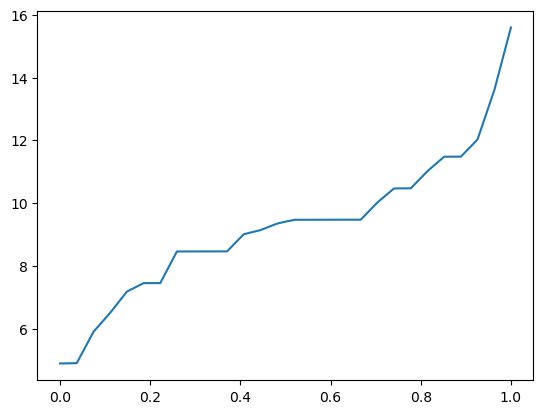

In [64]:
QHIS.tmin.plot()

In [55]:
plt.figure(1)
Hist_Updated.resample('Y').mean().plot()
plt.figure(1)

Hist_Mean.resample('Y').mean().plot()
plt.figure(1)

Present.resample('Y').mean().plot()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

<Figure size 640x480 with 0 Axes>

In [56]:
#Plot all together
plt.plot(Hist_Updated.resample('Y').mean(),label = 'Corrected')
plt.plot(Hist_Mean.resample('Y').mean(),label = 'Uncorrected')
plt.plot(Present.resample('Y').mean(),label = 'Present')
plt.legend()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [ ]:
#Histogram of the overall climate
plt.figure()
sns.histplot(data=Hist_30.loc['1846-01-01':'1875-12-31'], x="tmin", kde=True, label = 'Historical Uncorrected',cumulative=True,stat='density',color = 'g')
sns.histplot(data=Hist_Updated.loc['1846-01-01':'1875-12-31'], x="tmin", kde=True, label = 'Historical Corrected',cumulative=True,stat='density',color = 'b')
sns.histplot(data=Present_30, x="tmin", kde=True,color = 'r',label = 'Present',cumulative=True,stat='density')

plt.figure()
sns.histplot(data=Hist_30.loc['1846-01-01':'1875-12-31'], x="tmin", kde=True, label = 'Historical Uncorrected',cumulative=False,stat='density',color = 'g')
sns.histplot(data=Hist_Updated.loc['1846-01-01':'1875-12-31'], x="tmin", kde=True, label = 'Historical Corrected',cumulative=False,stat='density',color = 'b')
sns.histplot(data=Present_30, x="tmin", kde=True,color = 'r',label = 'Present',cumulative=False,stat='density')

In [ ]:
plt.figure()
sns.histplot(data=Hist_30.loc['1846-01-01':'1875-12-31'], x="tmax", kde=True, label = 'Historical Uncorrected',cumulative=True,stat='density',color = 'g')
sns.histplot(data=Hist_Updated.loc['1846-01-01':'1875-12-31'], x="tmax", kde=True, label = 'Historical Corrected',cumulative=True,stat='density',color = 'b')
sns.histplot(data=Present_30, x="tmax", kde=True,color = 'r',label = 'Present',cumulative=True,stat='density')

plt.figure()
sns.histplot(data=Hist_30.loc['1846-01-01':'1875-12-31'], x="tmax", kde=True, label = 'Historical Uncorrected',cumulative=False,stat='density',color = 'g')
sns.histplot(data=Hist_Updated.loc['1846-01-01':'1875-12-31'], x="tmax", kde=True, label = 'Historical Corrected',cumulative=False,stat='density',color = 'b')
sns.histplot(data=Present_30, x="tmax", kde=True,color = 'r',label = 'Present',cumulative=False,stat='density')

In [ ]:
Present_30


## LETS MAKE IT A FUNCTION

In [35]:
#Now lets load thedatasets in
Hist_Max = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\FOR HOMOGENISATION\Tmax_Est_1830_1875.csv")
Hist_Min = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\FOR HOMOGENISATION\Tmin_Est_1830_1875.csv")
Present = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\FOR HOMOGENISATION\ACORN_SAT_1880_2021.csv")

In [32]:
def Simple_QQ_Regression(Q_step, Historical, Present, Hist_Dates, Pres_Date):
    '''
    Q_step: Value
    Must be non negative and at least less the 0.1
    
    Historical: DataFrame
    Must have the date as the index
    
    Present: DataFrame
    Must have the date as the index
    
    Hist_Dates/Pres_Dates: Vector
    String of the dates in Y-M-D or the format that is given with the dataframes
    
    '''
    
    number = Q_step
    Historical_All = Historical
    Present = Present
    Hist_QQ_Dates_St = Hist_Dates[0]
    Hist_QQ_Dates_En = Hist_Dates[1]

    Pres_QQ_Date_St = Pres_Date[0]
    Pres_QQ_Date_En = Pres_Date[1]
    #^ call in using function





    Historical_30 = Historical_All.loc[Hist_QQ_Dates_St:Hist_QQ_Dates_En].reset_index()
    Present_30 = Present.loc[Pres_QQ_Date_St:Pres_QQ_Date_En].reset_index()



    #Select a nparange value lemgth that goes from Q0 to Q1, and produce the quantiles
    QPRE = Present_30.quantile(np.arange(0,1+number,number)).round(4)
    QPRE = QPRE.rename_axis('Quantile').reset_index()

    QHIS = Historical_30.quantile(np.arange(0,1+number,number)).round(4)
    QHIS = QHIS.rename_axis('Quantile').reset_index()


    Hist_All = Historical_All.reset_index()
    #This above is the full range of historical data

    #What we will do is append it to max and min values before combiniing with dat
    Hist_Updated_Max = []
    Hist_Updated_Min = []
    Hist_Updated_Date = []




    #For loop for all dates 
    for i in range(0,len(Hist_All)):
        Hist_Updated_Date.append(Hist_All['date'].loc[i])


        #Now get all the information from the Q-Q data for max and min for each date
        #MAX

        #If data shows a nan value set the updated value to nan
        if (math.isnan(Hist_All['tmax'].loc[i])== True):
            Hist_Updated_Max.append(np.NaN)
        else:
            #Set Temp old 
            Temp_Old = Hist_All['tmax'].loc[i]



            #So now we get the closest value for the max:
            Column = ['tmax']

            #This finds the value where the Q-Hist of the tmax is the minimum it can be for the tmax value presented
            Min_val = np.abs(QHIS[Column] - Temp_Old).min()

            #This finds the quantile*10^5 or by the decimla place you use to find the tmax
            closest_index =  QHIS[np.abs(QHIS[Column]- Temp_Old) == Min_val].stack().idxmin()

            #Now this will use the index to find the Present Vlaue to updayte the historical value to using the index/quantile*10^%
            Hist_Updated_Max.append(QPRE[Column].loc[closest_index[0]].values[0])

        #Now get all the information from the Q-Q data for max and min for each date
        #MIN

        #If data shows a nan value set the updated value to nan
        if (math.isnan(Hist_All['tmin'].loc[i])== True):
            Hist_Updated_Min.append(np.NaN)
        else:
            #Set Temp old 
            Temp_Old = Hist_All['tmin'].loc[i]


            #So now we get the closest value for the max:
            Column = ['tmin']

            #This finds the value where the Q-Hist of the tmax is the minimum it can be for the tmax value presented
            Min_val = np.abs(QHIS[Column] - Temp_Old).min()

            #This finds the quantile*10^5 or by the decimla place you use to find the tmax
            closest_index =  QHIS[np.abs(QHIS[Column]- Temp_Old) == Min_val].stack().idxmin()

            #Now this will use the index to find the Present Vlaue to updayte the historical value to using the index/quantile*10^%
            Hist_Updated_Min.append(QPRE[Column].loc[closest_index[0]].values[0])
    Hist_Updated_Date = pd.DataFrame(Hist_Updated_Date, columns=['date'])
    Hist_Updated_Max = pd.DataFrame(Hist_Updated_Max, columns=['tmax'])
    Hist_Updated_Min = pd.DataFrame(Hist_Updated_Min, columns=['tmin'])


    #Now combine altogether
    Hist_Updated = pd.concat([Hist_Updated_Date, Hist_Updated_Max, Hist_Updated_Min], axis = 1)
    return(Hist_Updated)
        
        
        
Simple_QQ_Regression(0.0001, Hist_Mean, Present, ['1846-01-01',"1875-12-31"], ['1880-01-01',"1909-12-31"])
        
    

,date,tmax,tmin
0,1830-04-16,46.5,NaN
1,1830-04-17,46.5,20.9
2,1830-04-18,46.5,27.7
3,1830-04-19,46.5,27.7
4,1830-04-20,46.5,17.6
...,...,...,...
16692,1875-12-28,46.5,NaN
16693,1875-12-29,46.5,27.7
16694,1875-12-30,46.5,27.7
16695,1875-12-31,46.5,27.7


In [34]:
Hist_Max.columns


Hist_Max_Mean = Hist_Max[['date','Max Mean']]
Hist_Min_Mean = Hist_Min[['date','Min Mean']]




Hist_Max_Mean = Hist_Max_Mean.rename(columns={'Max Mean':'tmax'})
Hist_Min_Mean = Hist_Min_Mean.rename(columns={'Min Mean':'tmin'})

Hist_Mean = pd.concat([Hist_Max_Mean['date'], Hist_Max_Mean['tmax'],Hist_Min_Mean['tmin']],axis = 1)




Hist_Mean =Hist_Mean.round(1).set_index('date')
Hist_Mean

Present = Present.set_index('date')
Present

#SFP.Simple_QQ_Regression(0.0001, Hist_Mean, Present, ['1846-01-01',"1875-12-31"], ['1880-01-01',"1909-12-31"])










,date,tmax,tmin
0,1830-04-16 00:00:00,25.1,NaN
1,1830-04-17 00:00:00,25.8,10.7
2,1830-04-18 00:00:00,28.1,13.2
3,1830-04-19 00:00:00,26.3,14.0
4,1830-04-20 00:00:00,24.3,7.8
...,...,...,...
16692,1875-12-28 00:00:00,38.1,NaN
16693,1875-12-29 00:00:00,35.4,18.3
16694,1875-12-30 00:00:00,33.0,14.4
16695,1875-12-31 00:00:00,25.5,14.3


In [38]:
#Now lets load thedatasets in
Hist_Max = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\FOR HOMOGENISATION\Tmax_Est_1830_1875.csv")
Hist_Min = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\FOR HOMOGENISATION\Tmin_Est_1830_1875.csv")
Present = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\FOR HOMOGENISATION\ACORN_SAT_1880_2021.csv")

HMax_Col = Hist_Max.columns
HMin_Col = Hist_Min.columns
Present = Present
length_col = len(HMax_Col)

i =1

#Fix the data so its only one trail we are looking at first, this is the columns of the max and min
Hist_Max_Col = Hist_Max[['date',HMax_Col[i]]]
Hist_Min_Col = Hist_Min[['date',HMin_Col[i]]]

#We rename them to they have tmax and tmin
Hist_Max_Col = Hist_Max_Col.rename(columns={HMax_Col[i]:'tmax'})
Hist_Min_Col = Hist_Min_Col.rename(columns={HMin_Col[i]:'tmin'})

#We add the historical datasets together
Hist_Together = pd.concat([Hist_Max_Col['date'], Hist_Max_Col['tmax'],Hist_Min_Col['tmin']],axis = 1)






#This is the first trial
Hist_Corrected = Simple_QQ_Regression(0.0001, Hist_Together, Present, ['1846-01-01',"1875-12-31"], ['1880-01-01',"1909-12-31"])

#This is the corrected temps
Hist_Corrected = Hist_Corrected.rename(columns={'tmax':HMax_Col[i]})
Hist_Corrected = Hist_Corrected.rename(columns={'tmin':HMin_Col[i]})

#This is the full list
Hist_Corrected_Dict_Full = Hist_Corrected

print(Hist_Corrected_Dict_Full)


for i in range(2,3):#length_col):
    print(i)
    #Fix the data so its only one trail we are looking at first
    Hist_Max_Col = Hist_Max[['date',HMax_Col[i]]]
    Hist_Min_Col = Hist_Min[['date',HMin_Col[i]]]


    Hist_Max_Col = Hist_Max_Col.rename(columns={HMax_Col[i]:'tmax'})
    Hist_Min_Col = Hist_Min_Col.rename(columns={HMin_Col[i]:'tmin'})

    Hist_Mean = pd.concat([Hist_Max_Col['date'], Hist_Max_Col['tmax'],Hist_Min_Col['tmin']],axis = 1)

    Hist_Corrected = Simple_QQ_Regression(0.0001, Hist_Mean, Present, ['1846-01-01',"1875-12-31"], ['1880-01-01',"1909-12-31"])
    
    Hist_Corrected = Hist_Corrected.rename(columns={'tmax':HMax_Col[i]})
    Hist_Corrected = Hist_Corrected.rename(columns={'tmin':HMin_Col[i]})
    
    Hist_Corrected_Dict_Full = pd.merge(Hist_Corrected_Dict_Full,Hist_Corrected,on = 'date')







                      date  Max Mean  Min Mean
0      1830-04-16 00:00:00      42.1       NaN
1      1830-04-17 00:00:00      42.1   22.0457
2      1830-04-18 00:00:00      42.1   22.8000
3      1830-04-19 00:00:00      42.1   22.8000
4      1830-04-20 00:00:00      42.1   19.7880
...                    ...       ...       ...
16692  1875-12-28 00:00:00      42.1       NaN
16693  1875-12-29 00:00:00      42.1   22.8000
16694  1875-12-30 00:00:00      42.1   22.8000
16695  1875-12-31 00:00:00      42.1   22.8000
16696  1876-01-01 00:00:00       NaN   22.8000

[16697 rows x 3 columns]
2


KeyboardInterrupt: 

In [37]:
Hist_Corrected

,date,Max Mean,Min Mean
0,1830-04-16 00:00:00,42.1,NaN
1,1830-04-17 00:00:00,42.1,22.0457
2,1830-04-18 00:00:00,42.1,22.8000
3,1830-04-19 00:00:00,42.1,22.8000
4,1830-04-20 00:00:00,42.1,19.7880
...,...,...,...
16692,1875-12-28 00:00:00,42.1,NaN
16693,1875-12-29 00:00:00,42.1,22.8000
16694,1875-12-30 00:00:00,42.1,22.8000
16695,1875-12-31 00:00:00,42.1,22.8000


In [ ]:
Present

In [52]:
#Now lets load thedatasets in
Hist_Max = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\FOR HOMOGENISATION\Tmax_Est_1830_1875.csv")
Hist_Min = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\FOR HOMOGENISATION\Tmin_Est_1830_1875.csv")
Present = pd.read_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\FOR HOMOGENISATION\ACORN_SAT_1880_2021.csv")

HMax_Col = Hist_Max.columns
HMin_Col = Hist_Min.columns
Present = Present
length_col = len(HMax_Col)

i =1

#Fix the data so its only one trail we are looking at first, this is the columns of the max and min
Hist_Max = Hist_Max[['date',HMax_Col[i]]]
Hist_Min = Hist_Min[['date',HMin_Col[i]]]


#We rename them to they have tmax and tmin
Hist_Max = Hist_Max.rename(columns={HMax_Col[i]:'tmax'})
Hist_Min = Hist_Min.rename(columns={HMin_Col[i]:'tmin'})

#We add the historical datasets together
Hist_Together = pd.concat([Hist_Max['date'], Hist_Max['tmax'],Hist_Min['tmin']],axis = 1)
Hist_Together





#This is the first trial
Hist_Corrected = Simple_QQ_Regression(0.0001, Hist_Together, Present, ['1846-01-01',"1875-12-31"], ['1880-01-01',"1909-12-31"])
Hist_Corrected
#This is the corrected temps
#Hist_Corrected = Hist_Corrected.rename(columns={'tmax':HMax_Col[i]})
#Hist_Corrected = Hist_Corrected.rename(columns={'tmin':HMin_Col[i]})

#This is the full list
#Hist_Corrected_Dict_Full = Hist_Corrected

#print(Hist_Corrected_Dict_Full)

,date,tmax,tmin
0,1830-04-16 00:00:00,42.1,NaN
1,1830-04-17 00:00:00,42.1,22.0457
2,1830-04-18 00:00:00,42.1,22.8000
3,1830-04-19 00:00:00,42.1,22.8000
4,1830-04-20 00:00:00,42.1,19.7880
...,...,...,...
16692,1875-12-28 00:00:00,42.1,NaN
16693,1875-12-29 00:00:00,42.1,22.8000
16694,1875-12-30 00:00:00,42.1,22.8000
16695,1875-12-31 00:00:00,42.1,22.8000
